In [328]:
import importlib
# import mc_err_prop as mcep
# importlib.reload(mc_err_prop)
import mc_err_prop as mcep

# # moduleName = input('Enter module name:')
# importlib.import_module('mc_err_prop')

In [329]:
# parallax = input_parameter(name='parallax',
#                            mu=2.5548873323091184,
#                            sigma=0.30749596446329935,
#                            unit=u.mas)

parallax = parameter(is_input=True,
                     label='parallax',
                     mu=0.7338431497699165,
                     sigma=0.24844438357960064,
                     val_min=0.0,
                     unit=u.mas)

# def distance_from_parallax(parallax):
#     distance = u.parsec / parallax * u.arcsec
#     return distance

distance_from_parallax = lambda parallax: u.parsec / parallax * u.arcsec

distance = parameter(label='distance',
                     func=distance_from_parallax,
                     inputs=parallax,
                     unit=u.pc)

In [330]:
mcep.do_mc(distance, 10000)

Resampling...	   0 out-of-bounds samples left

Result:
distance = ( 1.36 +0.70 / -0.34 ) x 10^3 pc


<Quantity [1364.15115555,  696.84426681,  343.55560803] pc>

In [306]:
t_star = mcep.parameter(is_input=True,
                        label='T_\star',
                        mu=4550,
                        sigma=[140, 131],
                        unit=u.K)

m_star = mcep.parameter(is_input=True,
                        label='M_\star',
                        mu=0.666,
                        sigma=[0.067, 0.059],
                        unit=u.Msun)

r_star = mcep.parameter(is_input=True,
                        label='R_\star',
                        mu=0.660,
                        sigma=[0.060, 0.059],
                        unit=u.Rsun)

def f_logg_cgs(m_star, r_star):
    logg = np.log10( const.G.cgs * m_star.cgs / r_star.cgs**2 
                   / u.cm * u.s**2 )
    return logg

def f_l_star(r_star, t_star):
    return 4. * np.pi * r_star**2 * const.sigma_sb * t_star**4;

logg = mcep.parameter(is_input=False,
                      label='log(g)',
                      func=f_logg_cgs,
                      inputs=[m_star, r_star],
                      unit=u.dimensionless_unscaled)

l_star = mcep.parameter(is_input=False,
                        label='L_\star',
                        func=f_l_star,
                        inputs=[r_star, t_star],
                        unit=u.Lsun)

Assuming sigma values of T_\star are given as +/-
Assuming sigma values of M_\star are given as +/-
Assuming sigma values of R_\star are given as +/-


In [307]:
mcep.do_mc(logg, nmc=10000)

Asymmetric uncertainties of M_\star treated usingtwo half-normal distributions
Asymmetric uncertainties of R_\star treated usingtwo half-normal distributions

Result:
log(g) = 4.624 +0.089 / -0.086 


<Quantity [4.62361794, 0.08870863, 0.08583823]>

In [332]:
width = parameter(is_input=True,
                  label='width',
                  mu=1,
                  sigma=0.1,
                  unit=u.cm)

height = parameter(is_input=True,
                   label='height',
                   mu=2,
                   sigma=0.1,
                   unit=u.cm)

depth = parameter(is_input=True,
                  label='depth',
                  mu=3,
                  sigma=0.1,
                  unit=u.cm)

def rectangle_area(width, height):
    area = width * height
    return area

def block_volume(width, height, depth):
    volume = width * height * depth
    return volume

def block_mass(volume, density=1.*u.g/u.cm**3):
    mass = volume * density
    return mass

area_front = parameter(label='area front',
                       func=rectangle_area,
                       inputs=[width, height],
                       unit=u.cm**2)

volume = parameter(label='volume', \
                   func=block_volume, \
                   inputs=[width, height, depth], \
                   unit=u.cm**3)

mass = parameter(label='mass', \
                 func=block_mass, \
                 inputs=volume, \
                 unit=u.g)

In [334]:
mcep.do_mc(mass, 10000)


Result:
mass = 5.98 +0.72 / -0.68 g


<Quantity [5.98490662, 0.72108035, 0.67547084] g>

In [200]:
mcep.do_mc_multi([logg, l_star], nmc=10000)

Asymmetric uncertainties of M_\star treated usingtwo half-normal distributions
Asymmetric uncertainties of R_\star treated usingtwo half-normal distributions
Asymmetric uncertainties of T_\star treated usingtwo half-normal distributions


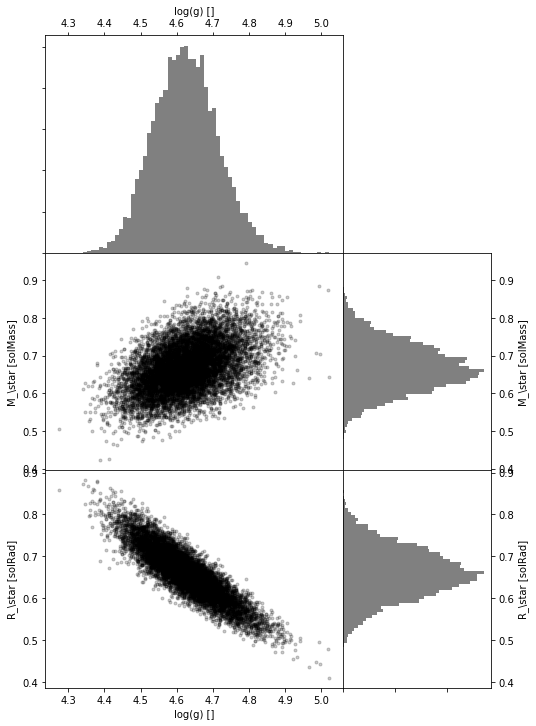

In [76]:
mcep.err_prop_hist(logg)

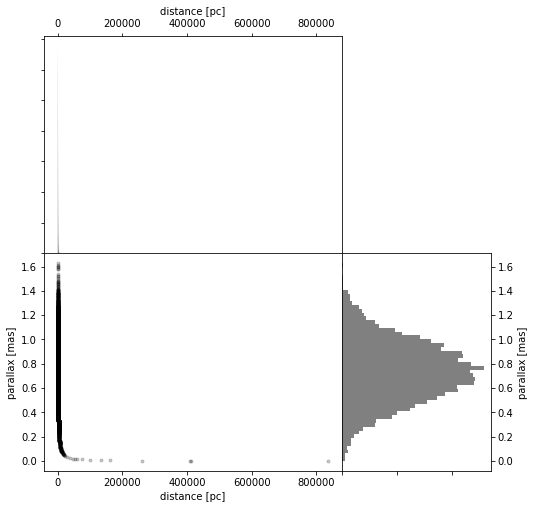

In [210]:
mcep.err_prop_hist(distance)

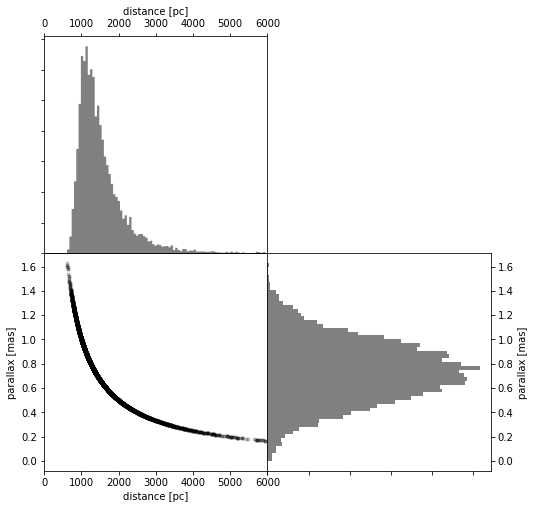

In [220]:
inp = parallax
outp = distance
bins = 'auto'

x = outp.samples.value
# x = np.log10(outp.samples.value)
y = inp.samples.value
x_label_string = '%s [%s]' % (outp.label, outp.unit.to_string() )
y_label_string = '%s [%s]' % (inp.label, inp.unit.to_string() )

# Set up the axes with gridspec
fig = plt.figure(figsize=(8, 8), facecolor='w', edgecolor='k')
grid = plt.GridSpec(4, 4, hspace=0, wspace=0)
main_ax = fig.add_subplot(grid[2:, :-2])
y_hist = fig.add_subplot(grid[2:, -2:], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[:2, :-2], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2, rasterized=True)
main_ax.set_xlabel(x_label_string)
main_ax.set_ylabel(y_label_string)
main_ax.set_xlim([0., 6000.])

# histogram on the attached axes
x_hist.hist(x, bins, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.set_xlabel(x_label_string)
x_hist.xaxis.tick_top()
x_hist.xaxis.set_label_position('top')

y_hist.hist(y, bins, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.set_ylabel(y_label_string)
y_hist.yaxis.tick_right()
y_hist.yaxis.set_label_position('right')

In [213]:
np.percentile(distance.samples, [10., 50., 90.])

array([ 952.41489288, 1358.79530392, 2403.7037702 ])

In [222]:
np.percentile(distance.samples, 50.)

1358.795303917413

In [260]:
q_16, q_50, q_84 = np.quantile(distance.samples, [0.16, 0.5, 0.84])
q_m, q_p = q_50-q_16, q_84-q_50

In [271]:
min( np.abs( [q_ms, q_ps] ) )

0.34584538942643167

In [272]:
# q_m = 30.

scaling_exp = int( np.floor( np.log10( q_50 ) ) )
scaling = 10.**scaling_exp

q_50s, q_ps, q_ms = q_50/scaling, q_p/scaling, q_m/scaling

err_exp = np.floor( np.log10( min( np.abs( [q_ms, q_ps] ) ) ) )
sigdig = max(-int(err_exp)+1, 1)

print('Result:')
print('%s = ( %.*f +%.*f / -%.*f ) x 10^%d %s' % (distance.label,
    sigdig, q_50s, sigdig, q_ps, sigdig, q_ms, scaling_exp, distance.unit) )


Result:
distance = ( 1.36 +0.68 / -0.35 ) x 10^3 pc


In [248]:


scaling = 1.e3
exp_scaling = int( np.log10(scaling) )

q_50s, q_ps, q_ms = q_50 / scaling, q_p / scaling, q_m / scaling

print(scaling)
print('Result:')
print('%s = %.2f +%.2f / -%.2f x 10^%d %s' % 
      (distance.label, q_50s, q_ps, q_ms, exp_scaling, distance.unit) )

1000.0
Result:
distance = 1.36 +0.70 / -0.34 x 10^3 pc


In [ ]:
print('%*s : %*s' % (width, 'Python', width, 'Very Good') )